# **PROJECT : Calories Burnt Prediction**

**Import required libraries**

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
df=pd.read_csv('/content/calories.csv')
df

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [127]:
df1=pd.read_csv('/content/exercise.csv')
df1

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


**Concatination two tables**

In [128]:
cal=pd.concat([df,df1],axis=1)
cal

,User_ID,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...,...,...
14995,15644082,45.0,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [129]:
cal.head()

,User_ID,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [130]:
cal.tail()

,User_ID,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
14995,15644082,45.0,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,18643037,male,78,193.0,97.0,2.0,84.0,38.3
14999,11751526,98.0,11751526,male,63,173.0,79.0,18.0,92.0,40.5


**Statistical measures of the dataset**

In [131]:
cal.describe()

,User_ID,Calories,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [132]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   User_ID     15000 non-null  int64  
 3   Gender      15000 non-null  object 
 4   Age         15000 non-null  int64  
 5   Height      15000 non-null  float64
 6   Weight      15000 non-null  float64
 7   Duration    15000 non-null  float64
 8   Heart_Rate  15000 non-null  float64
 9   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 1.1+ MB


**Checking missing values**

In [133]:
cal.isna().sum()

User_ID       0
Calories      0
User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [134]:
cal.dtypes

User_ID         int64
Calories      float64
User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
dtype: object

**Find value counts and visual representation**

In [135]:
cal['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

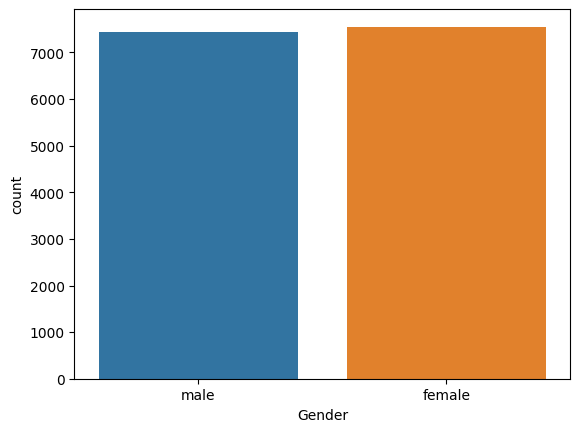

In [136]:
sns.countplot(x='Gender',data=cal)

**Distribution of Height**

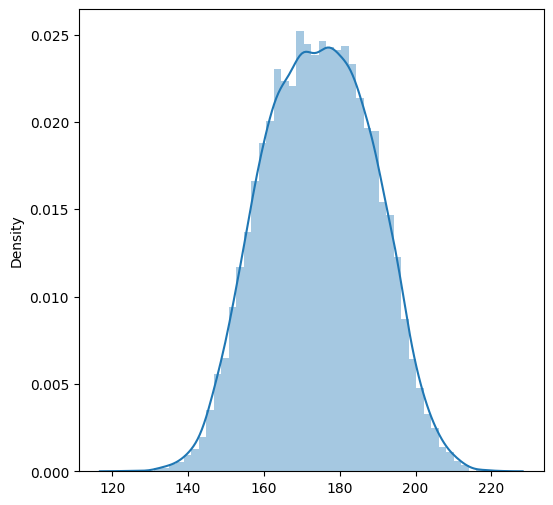

In [137]:
plt.figure(figsize=(6,6))
sns.distplot(x=cal.Height)
plt.show()

**Distribution of Weight**

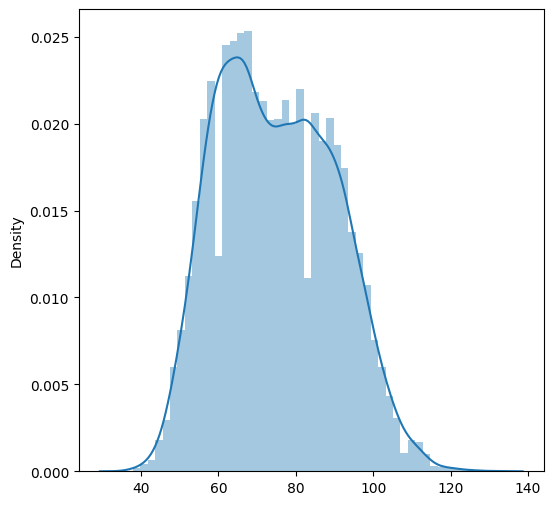

In [138]:
plt.figure(figsize=(6,6))
sns.distplot(x=cal.Weight)
plt.show()

**Distribution of Age**

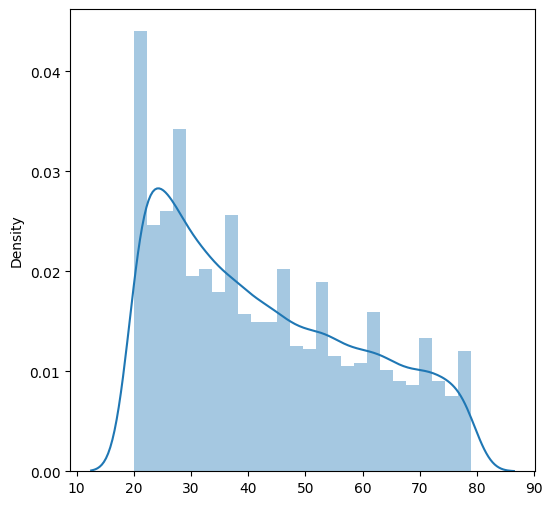

In [139]:
plt.figure(figsize=(6,6))
sns.distplot(x=cal.Age)
plt.show()

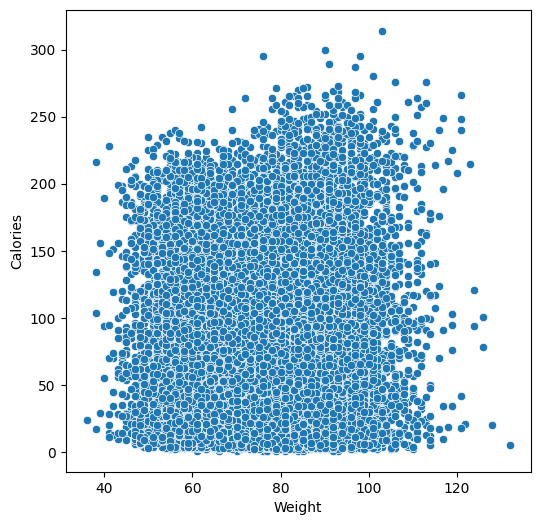

In [140]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=cal.Weight,y=cal.Calories)
plt.show()

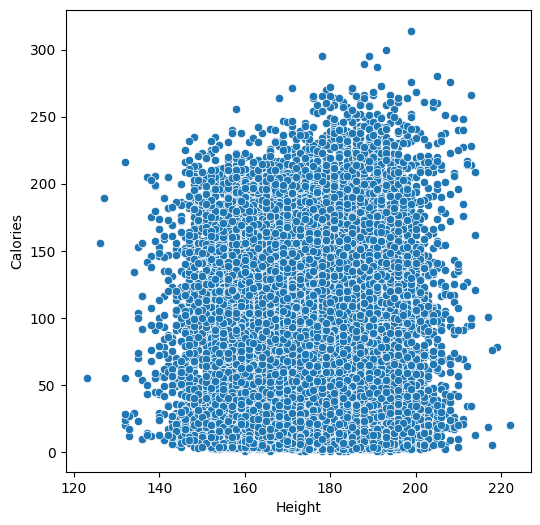

In [141]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=cal.Height,y=cal.Calories)
plt.show()

<Axes: xlabel='Duration', ylabel='Count'>

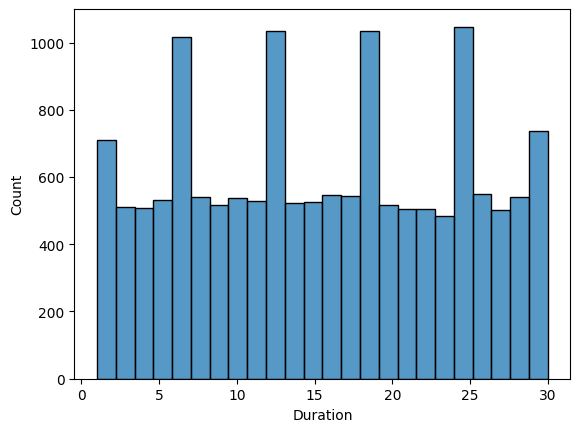

In [142]:
sns.histplot(x=cal['Duration'])

<Axes: xlabel='Heart_Rate', ylabel='Count'>

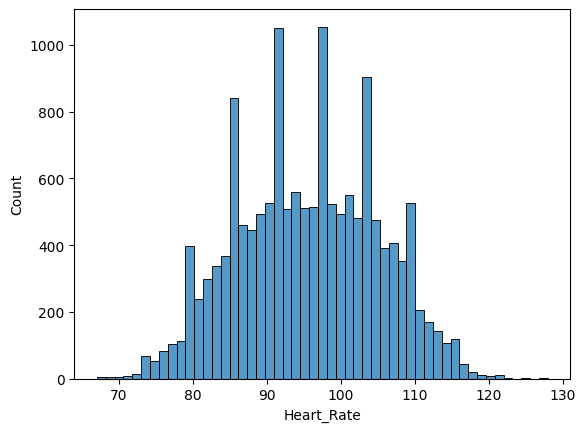

In [143]:
sns.histplot(x=cal['Heart_Rate'])

<Axes: xlabel='Body_Temp', ylabel='Count'>

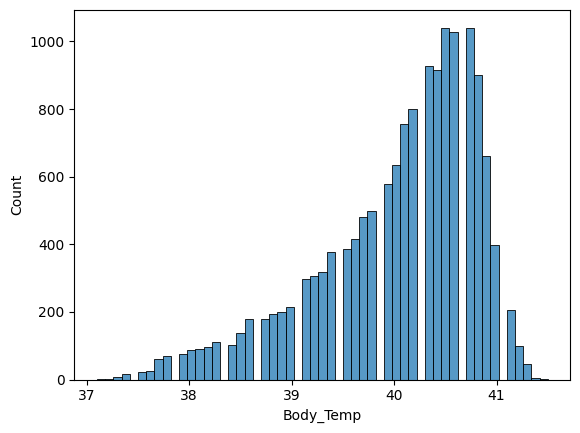

In [144]:
sns.histplot(x=cal['Body_Temp'])

**Display Correlation of data**

In [145]:
corr=cal.corr()

<Axes: >

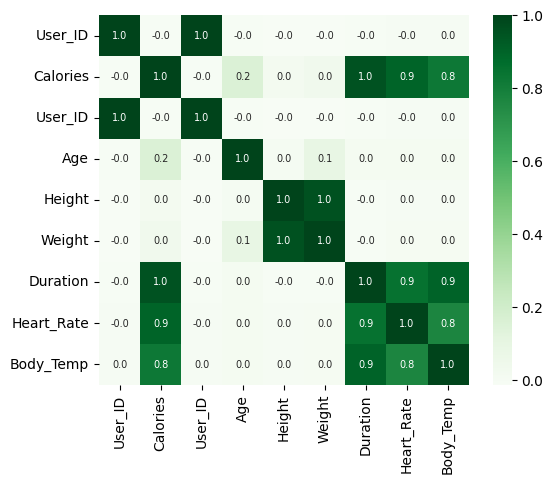

In [146]:
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':7},cmap='Greens')

**Remove unwanted columns**

In [147]:
cal.drop(['User_ID','Gender','Age','Height','Weight'],axis=1,inplace=True)
cal.head()

,Calories,Duration,Heart_Rate,Body_Temp
0,231.0,29.0,105.0,40.8
1,66.0,14.0,94.0,40.3
2,26.0,5.0,88.0,38.7
3,71.0,13.0,100.0,40.5
4,35.0,10.0,81.0,39.8


**Separate input features and target**

In [148]:
x=cal.iloc[:,1:]
x

,Duration,Heart_Rate,Body_Temp
0,29.0,105.0,40.8
1,14.0,94.0,40.3
2,5.0,88.0,38.7
3,13.0,100.0,40.5
4,10.0,81.0,39.8
...,...,...,...
14995,11.0,92.0,40.4
14996,6.0,85.0,39.2
14997,16.0,90.0,40.1
14998,2.0,84.0,38.3


In [149]:
y=cal['Calories']
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

**Feature selection using Pearson's**

In [150]:
correlation_matrix=x.corrwith(y)

In [151]:
selected_features=correlation_matrix.abs().sort_values(ascending=False).index
selected_features

Index(['Duration', 'Heart_Rate', 'Body_Temp'], dtype='object')

In [152]:
x1=x[selected_features]
x1

,Duration,Heart_Rate,Body_Temp
0,29.0,105.0,40.8
1,14.0,94.0,40.3
2,5.0,88.0,38.7
3,13.0,100.0,40.5
4,10.0,81.0,39.8
...,...,...,...
14995,11.0,92.0,40.4
14996,6.0,85.0,39.2
14997,16.0,90.0,40.1
14998,2.0,84.0,38.3


<Axes: xlabel='Duration', ylabel='Calories'>

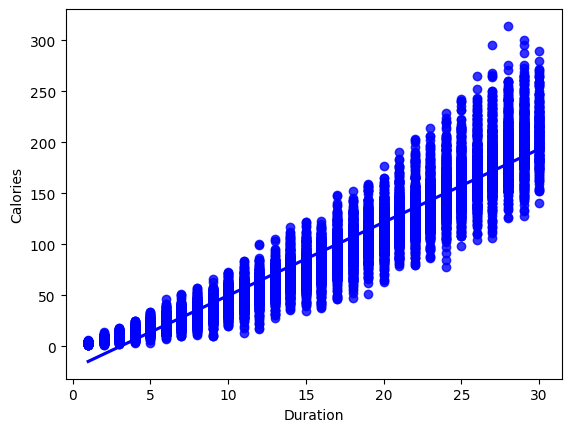

In [153]:
sns.regplot(x=cal['Duration'],y=y,color='blue')

<Axes: xlabel='Heart_Rate', ylabel='Calories'>

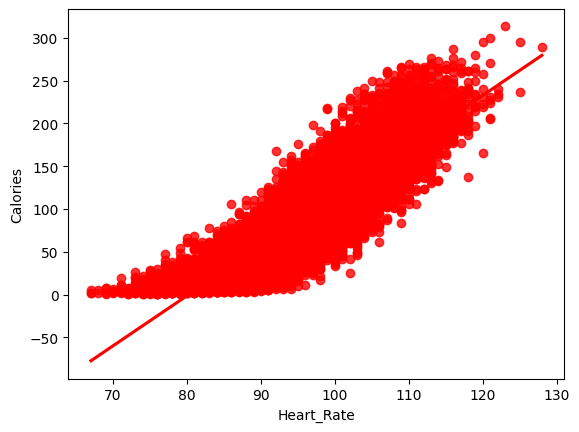

In [154]:
sns.regplot(x=cal['Heart_Rate'],y=y,color='red')

<Axes: xlabel='Body_Temp', ylabel='Calories'>

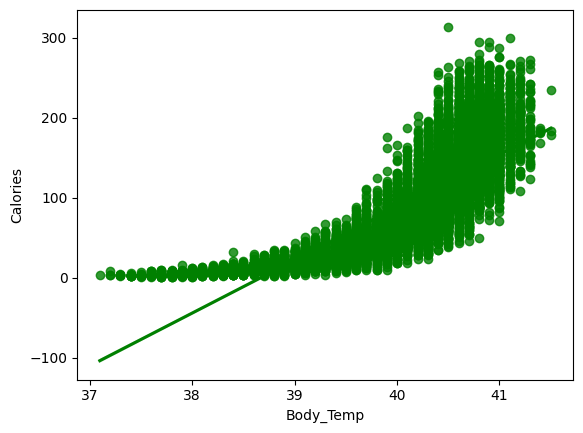

In [155]:
sns.regplot(x=cal['Body_Temp'],y=y,color='green')

**Training & Testing data**

In [156]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.30,random_state=42)
x_train

,Duration,Heart_Rate,Body_Temp
11797,3.0,79.0,38.6
5899,20.0,98.0,40.2
9513,19.0,100.0,40.4
1572,28.0,107.0,40.9
12995,4.0,85.0,39.0
...,...,...,...
5191,22.0,104.0,40.6
13418,20.0,104.0,40.7
5390,8.0,90.0,39.5
860,12.0,97.0,40.2


In [157]:
x_test
y_train
y_test

11499    173.0
6475     189.0
13167     53.0
862      161.0
5970     226.0
         ...  
4217      40.0
13886     38.0
10464     30.0
6902     198.0
4874     138.0
Name: Calories, Length: 4500, dtype: float64

**Model Creation using**
- LinearRegression
- DecisionTreeRegressor
- RandomForestRegressor

**LinearRegression**

**Hyperparameter tuning**

In [158]:
from sklearn.linear_model import LinearRegression
lg_model=LinearRegression()
lg_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [159]:
import warnings
warnings.filterwarnings('ignore')

In [160]:
parameter={'copy_X':[True,False],'fit_intercept':[True,False],'n_jobs':[None,1,5,7,6],'positive':[True,False]}
gsv=GridSearchCV(lg_model,parameter,cv=10,scoring='accuracy')
gsv.fit(x_train,y_train)
print(gsv.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}


**Model creation**

In [161]:
lg_model1=LinearRegression(positive=True)
lg_model1.fit(x_train,y_train)
y_pred=lg_model1.predict(x_test)
y_pred

array([166.81480338, 190.39659098,  54.89597475, ...,  32.89775586,
       162.02961276, 134.04128449])

**Find errors**

In [162]:
df2=pd.DataFrame({'act_value':y_test,'pred_value':y_pred,'diff':y_test-y_pred})
df2

,act_value,pred_value,diff
11499,173.0,166.814803,6.185197
6475,189.0,190.396591,-1.396591
13167,53.0,54.895975,-1.895975
862,161.0,158.414856,2.585144
5970,226.0,200.380107,25.619893
...,...,...,...
4217,40.0,62.504137,-22.504137
13886,38.0,44.499325,-6.499325
10464,30.0,32.897756,-2.897756
6902,198.0,162.029613,35.970387


**Slop and Constant**

In [163]:
print('slope',lg_model1.coef_)
list(zip(x,lg_model1.coef_))

slope [5.19832503 1.99670313 0.        ]


[('Duration', 5.198325029082913),
 ('Heart_Rate', 1.9967031287008616),
 ('Body_Temp', 0.0)]

In [164]:
print('constant',lg_model1.intercept_)

constant -181.98888215126755


**Performance Evaluation(errors)**

In [165]:
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE',mean_absolute_percentage_error(y_test,y_pred))

MAPE 0.3898731483519509


In [166]:
from sklearn.metrics import r2_score
r0=r2_score(y_test,y_pred)
print('R2_SCORE: ',r0)

R2_SCORE:  0.9367666829129554


**DecisionTreeRegressor**

**Hyperparameter tuning**

In [167]:
from sklearn.tree import DecisionTreeRegressor
dec=DecisionTreeRegressor()
param={'max_depth':[2,4,6,8],'min_samples_split':[2,4,6,8],'min_samples_leaf':[1,2,3,4],'max_features':['auto','sqrt','log2']}
grid_search=GridSearchCV(estimator=dec,param_grid=param,cv=5,scoring='neg_mean_squared_error',n_jobs=1)
grid_search.fit(x_train,y_train)
best_params=grid_search.best_params_
print('Best Hyperparameters',best_params)

Best Hyperparameters {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 8}


**Model creation**

In [168]:
dec1=DecisionTreeRegressor(max_depth=8,max_features='auto',min_samples_leaf=3,min_samples_split=4)
dec1.fit(x_train,y_train)
y_pred1=dec1.predict(x_test)
y_pred1

array([170.34210526, 205.60550459,  50.        , ...,  28.22222222,
       157.42592593, 133.57664234])

**Find errors**

In [169]:
df3=pd.DataFrame({'act_value':y_test,'pred_value':y_pred1,'diff':y_test-y_pred1})
df3

,act_value,pred_value,diff
11499,173.0,170.342105,2.657895
6475,189.0,205.605505,-16.605505
13167,53.0,50.000000,3.000000
862,161.0,165.794118,-4.794118
5970,226.0,226.407407,-0.407407
...,...,...,...
4217,40.0,60.101010,-20.101010
13886,38.0,41.365854,-3.365854
10464,30.0,28.222222,1.777778
6902,198.0,157.425926,40.574074


**Performance Evaluation(errors)**

In [170]:
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE',mean_absolute_percentage_error(y_test,y_pred1))

MAPE 0.12339144744903312


In [171]:
from sklearn.metrics import r2_score
r1=r2_score(y_test,y_pred1)
print('R2_SCORE: ',r1)

R2_SCORE:  0.9566564677075071


**RandomForestRegressor**

In [172]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor(n_estimators=100,random_state=40)
rfg.fit(x_train,y_train)
y_pred2=rfg.predict(x_test)
y_pred2

array([170.57919517, 219.9575    ,  50.56783719, ...,  27.6625    ,
       160.64405556, 126.48587698])

**Find errors**

In [173]:
df4=pd.DataFrame({'act_value':y_test,'pred_value':y_pred2,'diff':y_test-y_pred2})
df4

,act_value,pred_value,diff
11499,173.0,170.579195,2.420805
6475,189.0,219.957500,-30.957500
13167,53.0,50.567837,2.432163
862,161.0,167.416215,-6.416215
5970,226.0,239.479869,-13.479869
...,...,...,...
4217,40.0,53.210333,-13.210333
13886,38.0,42.773556,-4.773556
10464,30.0,27.662500,2.337500
6902,198.0,160.644056,37.355944


**Performance Evaluation(errors)**

In [174]:
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE',mean_absolute_percentage_error(y_test,y_pred2))

MAPE 0.13322413864178376


In [175]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred2)
print('R2_SCORE: ',r2)

R2_SCORE:  0.9505296072243411


<function matplotlib.pyplot.show(close=None, block=None)>

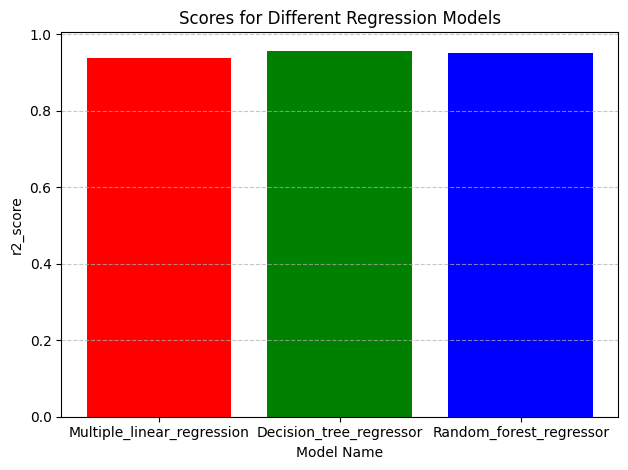

In [180]:
visual=['Multiple_linear_regression','Decision_tree_regressor','Random_forest_regressor']
result=[r0,r1,r2]
plt.bar(visual,result,color=['red','green','blue'])
plt.xlabel('Model Name')
plt.ylabel('r2_score')
plt.title('Scores for Different Regression Models')
plt.tight_layout() #ensure labels are not cut off
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show